#
<b>

==============================

Nama: Muhammad Iqbal Saputra

Batch: RMT-032

Objektif dari program ini adalah untuk mengambil data dari website yang dituju pada hal ini tokped, 
lalu menganalisis data dan menarik kesimpulan melalui pendekatan statistik dari data tersebut


==============================


In [2]:
%pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 730.2 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/8.0 MB 781.4 kB/s eta 0:00:10
   ----- ---------------------------------- 1.0/8.0 MB 883.6 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.0 MB 883.6 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.0 MB 883.6 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.0 MB 883.6 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.0 MB 639.4 kB/s eta 0:00:11
   ------- -------------------------------- 1.6/8.0 MB 699.0 kB/s eta 0:00:10
   --------- ------------------------------ 1.8/8.0 MB 740.2 kB/s eta 0:00:09
   ---------- --------

In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install selenium

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.5 MB 11.7 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.5 MB 11.9 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.5 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 11.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# import module-module yang diperlukan
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from bs4 import BeautifulSoup
import scipy.stats as stats

# A. Web Scraping

In [2]:
# inisialisasi dataframe
nama_produk = []
harga_produk = []
nama_toko = []
lokasi_toko = []
banyak_terjual = []
rating_produk = []


In [3]:
# membuat intance webdriver
driver = webdriver.Chrome()

# melakukan perulangan untuk 10 halaman
for i in range(10):
    url = f"https://www.tokopedia.com/search?navsource=&page={i}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st="
    driver.get(url)
    time.sleep(1)

    # melakukan scrolling ke bawah
    for i in range(50):
        driver.execute_script("window.scroll(0,500)")
        time.sleep(1)

    # mengambil HTML source
    html = driver.page_source

    # membuat objek BeautifulSoup
    soup = BeautifulSoup(html, "html.parser")

    # menghindari elemen iklan
    iklan = soup.select(".css-1nod7cp:not(.css-1asz3by)")

    # melakukan perulangan untuk setiap elemen
    for i in iklan:
        # menghapus elemen dari HTML source
        i.extract()

    # mencari elemen dengan class 'css-1asz3by'
    boxes = soup.find_all('div', {"class": "css-1asz3by"})

    # melakukan perulangan untuk setiap kotak produk
    for box in boxes:
        # nama produk
        try:
            nama_produk_element = box.find('div', {"class": "prd_link-product-name css-3um8ox"})
            nama_produk.append(nama_produk_element.get_text())
        except:
            nama_produk.append(None)
            
        # harga produk
        try:
            harga_produk_element = box.find('div', {"class": "prd_link-product-price css-h66vau"})
            harga_produk.append(harga_produk_element.get_text())
        except:
            harga_produk.append(None)
            
        # nama toko
        try:
            shop_name_element = box.find('span', {'class': 'prd_link-shop-name css-1kdc32b flip'})
            nama_toko.append(shop_name_element.get_text())
        except:
            nama_toko.append(None)

        # lokasi toko
        try:
            shop_location_element = box.find('span', {'class': 'prd_link-shop-loc css-1kdc32b flip'})
            lokasi_toko.append(shop_location_element.get_text())
        except:
            lokasi_toko.append(None)

        # banyak terjual
        try:
            sold_element_list = box.find_all('span', {"class": "prd_label-integrity css-1sgek4h"})
            for sold_element in sold_element_list:
                banyak_terjual.append(sold_element.get_text())
        except:
            banyak_terjual.append(None)
            
        # rating produk
        try:
            rating_element_list = box.find_all('span', {"class": "prd_rating-average-text css-t70v7i"})
            for rating_element in rating_element_list:
                rating_produk.append(rating_element.get_text())
        except:
            rating_produk.append(None)
            

# inisialisasi data frame
df = pd.DataFrame()

# memastikan semua panjang data sama
common_length = min(len(nama_produk), len(harga_produk), len(rating_produk), len(banyak_terjual), len(lokasi_toko), len(nama_toko))

# menambahkan data ke data frame
df['nama produk'] = nama_produk[:common_length]
df['harga produk'] = harga_produk[:common_length]
df['nama toko'] = nama_toko[:common_length]
df['lokasi toko'] = lokasi_toko[:common_length]
df['banyak terjual'] = banyak_terjual[:common_length]
df['rating produk'] = rating_produk[:common_length]

# mematikan driver
driver.quit()

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


In [4]:
# menampilkan data frame 5 teratas (memastikan apakah webscraping kita berhasil)
df.head()

,nama produk,harga produk,nama toko,lokasi toko,banyak terjual,rating produk


In [5]:
# menampilkan info data frame (memastikan apakah webscraping kita berhasil)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama produk     0 non-null      float64
 1   harga produk    0 non-null      float64
 2   nama toko       0 non-null      float64
 3   lokasi toko     0 non-null      float64
 4   banyak terjual  0 non-null      float64
 5   rating produk   0 non-null      float64
dtypes: float64(6)
memory usage: 124.0 bytes


In [6]:
# import dataframe ke csv
df.to_csv('seblak_produk.csv', index=False)

# B. Data Preparation

In [7]:
# membaca file CSV (data hasil scraping)
data_explore = pd.read_csv('seblak_produk.csv')

In [8]:
# menampilkan 5 data teratas dari data_explore
data_explore.head(5)

,nama produk,harga produk,nama toko,lokasi toko,banyak terjual,rating produk


In [9]:
# menampilkan 5 data terbawah dari data_explore
data_explore.tail(5)

,nama produk,harga produk,nama toko,lokasi toko,banyak terjual,rating produk


setelah sekilas melihat data, format harga produk dan banyak terjual masih belum menjadi format yang benar. semestinya format kolom tersebut int/float agar mudah di olah


In [10]:
# menampilkan informasi tentang data yang baru saja diimport dari file seblak_produk.csv
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nama produk     0 non-null      object
 1   harga produk    0 non-null      object
 2   nama toko       0 non-null      object
 3   lokasi toko     0 non-null      object
 4   banyak terjual  0 non-null      object
 5   rating produk   0 non-null      object
dtypes: object(6)
memory usage: 124.0+ bytes


In [11]:
# menampilkan statistik data numerik dari data_explore
data_explore.describe()

,nama produk,harga produk,nama toko,lokasi toko,banyak terjual,rating produk
count,0,0,0,0,0,0
unique,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN


dikarnakan data yang bertipe numerik hanya rating produk, hasil dari data_explore.describe() hanya hasil dari kolom rating produk, yang berarti data_explore belum bersih

In [12]:
# cek missing value dari setiap kolom
data_explore.isnull().sum()

nama produk       0
harga produk      0
nama toko         0
lokasi toko       0
banyak terjual    0
rating produk     0
dtype: int64

tidak ditemukan missing value

In [13]:
# incase terdapat missing value, kode ini akan menghilangkan baris yang memiliki missing value
data_explore.dropna(subset=['rating produk'], inplace=True)
data_explore.dropna(subset=['banyak terjual'], inplace=True)

In [14]:
# cek dan menampilkan jika ada baris yang duplikat
data_explore.duplicated().sum()

0

terdapat banyak baris yang terduplikat

In [15]:
# menampilkan baris yang duplikat
data_explore[data_explore.duplicated()]

,nama produk,harga produk,nama toko,lokasi toko,banyak terjual,rating produk


In [16]:
# menyimpan data tanpa duplikat 
data_explore_no_duplicates = data_explore.drop_duplicates()

# deep copy data agar ketika melakukan proses cleaning, tidak merubah data_explore
data_explore_no_duplicates = data_explore_no_duplicates.copy(deep=True)

In [17]:
# menampilkan informasi tentang data yang sudah bersih dari duplikat
data_explore_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nama produk     0 non-null      object
 1   harga produk    0 non-null      object
 2   nama toko       0 non-null      object
 3   lokasi toko     0 non-null      object
 4   banyak terjual  0 non-null      object
 5   rating produk   0 non-null      object
dtypes: object(6)
memory usage: 124.0+ bytes


In [18]:
# double cek missing value dari data yang sudah bersih dari duplikat
data_explore_no_duplicates.isnull().sum()

nama produk       0
harga produk      0
nama toko         0
lokasi toko       0
banyak terjual    0
rating produk     0
dtype: int64

In [19]:
# double cek incase terdapat missing value, 
# kode ini akan menghilangkan baris yang memiliki missing value
data_explore_no_duplicates.dropna(subset=['rating produk'], inplace=True)
data_explore_no_duplicates.dropna(subset=['banyak terjual'], inplace=True)

In [20]:
# menghapus "Rp" dari kolom "harga produk" dan merubah tipe data menjadi float
data_explore_no_duplicates['harga produk'] = data_explore_no_duplicates['harga produk'].str.replace('Rp', '').str.replace('.','').astype(float)

In [21]:
# menghapus karakter '+' dan 'terjual' pada kolom 'banyak terjual'
data_explore_no_duplicates['banyak terjual'] = data_explore_no_duplicates['banyak terjual'].str.replace('+', '').str.replace(' terjual', '')
# menganti 'rb+' menjadi '000'
data_explore_no_duplicates['banyak terjual'] = data_explore_no_duplicates['banyak terjual'].replace({'rb+': '000'}, regex=True).replace('[^\d\.]', '', regex=True).astype(int)
# mengubah tipe data pada kolom 'banyak terjual' menjadi numerik
data_explore_no_duplicates['banyak terjual'] = pd.to_numeric(data_explore_no_duplicates['banyak terjual'], errors='coerce')

In [22]:
# menampilkan data teratas yang sudah kita bersihkan (memastikan proses cleaning berhasil)
data_explore_no_duplicates.head()

,nama produk,harga produk,nama toko,lokasi toko,banyak terjual,rating produk


In [23]:
# menampilkan informasi data yang sudah kita bersihkan (memastikan proses cleaning berhasil)
data_explore_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama produk     0 non-null      object 
 1   harga produk    0 non-null      float64
 2   nama toko       0 non-null      object 
 3   lokasi toko     0 non-null      object 
 4   banyak terjual  0 non-null      int32  
 5   rating produk   0 non-null      object 
dtypes: float64(1), int32(1), object(4)
memory usage: 124.0+ bytes


In [24]:
# menampilkan statistik data yang berupa numerik
data_explore_no_duplicates.describe()

,harga produk,banyak terjual
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [25]:
# export data yang sudah dibersihkan ke csv 
data_explore_no_duplicates.to_csv('data_clean.csv')

# C. Business Understanding/Problem Statement

## **SMART Framework**

> Specific      : Menganalisis faktor-faktor yang mempengaruhi penjualan produk seblak di Tokopedia yang bertujuan utk meningkatkan penjualan.

> Measureable   : Diukur dari peningkatan jumlah konversi penjualan dan rating produk sebelum dan sesudah mengimplementasikan strategi, target terukur meningkatkan penjualan sebesar 15% dari serta meningkatkan skor rating minimal 0.5.

> Achieveable   : Menggunakan analisis data untuk menentukan harga jual yang optimal terhadap potensi pasar yang mempertimbangkan metriks-metriks penjualan seperti lokasi toko, harga produk, rating produk dan lain sebagainya.

> Relevant      : Mengoptimalkan penjualan produk pada platform, dan membantu para penjual/pelaku UMKM membuat keputusan bisnis berdasarkan data.

> Time-bound    : Proses ini akan dilakukan dalam waktu 6 bulan, termasuk pengumpulan data, analisis, dan implementasi.

Problem statment 
---
"Dalam waktu 6 bulan, kami akan meningkatkan penjualan produk seblak di Tokopedia sebesar 15% dan skor rating minimal 0.5 dengan menganalisis faktor-faktor kunci seperti lokasi toko, harga produk, dan rating produk, serta menggunakan hasil analisis untuk menentukan harga jual yang optimal dan membuat strategi penjualan yang efektif."

# D. Analysis

In [26]:
# import data yang sudah bersih
data_analysis = pd.read_csv('data_clean.csv')

In [27]:
# make sure data yang ingin kita analisis tipe datanya sudah sesuai
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      0 non-null      object
 1   nama produk     0 non-null      object
 2   harga produk    0 non-null      object
 3   nama toko       0 non-null      object
 4   lokasi toko     0 non-null      object
 5   banyak terjual  0 non-null      object
 6   rating produk   0 non-null      object
dtypes: object(7)
memory usage: 124.0+ bytes


## 1. Mean, Median, Standard Deviation, Skewness, Kurtosis

In [28]:
# menghitung rata-rata, median, standar deviasi, skew, dan kurtosis dari masing-masing kolom

# harga produk 
mean_hp = data_analysis['harga produk'].mean()
median_hp = data_analysis['harga produk'].median()
std_hp = data_analysis['harga produk'].std()
skew_hp = data_analysis['harga produk'].skew()
kurtosis_hp = data_analysis['harga produk'].kurtosis()

# banyak terjual
mean_bt = data_analysis['banyak terjual'].mean()
median_bt = data_analysis['banyak terjual'].median()
std_bt = data_analysis['banyak terjual'].std()
skew_bt = data_analysis['banyak terjual'].skew()
kurtosis_bt = data_analysis['banyak terjual'].kurtosis()

# rating produk
mean_r = data_analysis['rating produk'].mean()
median_r = data_analysis['rating produk'].median()
std_r = data_analysis['rating produk'].std()
skew_r = data_analysis['rating produk'].skew()
kurtosis_r = data_analysis['rating produk'].kurtosis()

In [29]:
# menampilkan hasil statistik

print(f"{'harga produk':^30}")
print(f"{'---------':^30}")
print(f"Mean \t\t\t= {mean_hp:.2f}")
print(f"Median \t\t\t= {median_hp:.2f}")
print(f"Standar deviasi \t= {std_hp:.2f}")
print(f"Skewness \t\t= {skew_hp:.2f}")
print(f"Kurtosis \t\t= {kurtosis_hp:.2f}")

print(f"\n{'banyak terjual':^30}")
print(f"{'---------':^30}")
print(f"Mean \t\t\t= {mean_bt:.2f}")
print(f"Median \t\t\t= {median_bt:.2f}")
print(f"Standar deviasi \t= {std_bt:.2f}")
print(f"Skewness \t\t= {skew_bt:.2f}")
print(f"Kurtosis \t\t= {kurtosis_bt:.2f}")

print(f"\n{'rating produk':^30}")
print(f"{'---------':^30}")
print(f"Mean \t\t\t= {mean_r:.2f}")
print(f"Median \t\t\t= {median_r:.2f}")
print(f"Standar deviasi \t= {std_r:.2f}")
print(f"Skewness \t\t= {skew_r:.2f}")
print(f"Kurtosis \t\t= {kurtosis_r:.2f}")
print(f"{'---------':^30}")


         harga produk         
          ---------           
Mean 			= nan
Median 			= nan
Standar deviasi 	= nan
Skewness 		= nan
Kurtosis 		= nan

        banyak terjual        
          ---------           
Mean 			= nan
Median 			= nan
Standar deviasi 	= nan
Skewness 		= nan
Kurtosis 		= nan

        rating produk         
          ---------           
Mean 			= nan
Median 			= nan
Standar deviasi 	= nan
Skewness 		= nan
Kurtosis 		= nan
          ---------           


### **Insight**
***'harga produk'***
- **Mean dan Median**: harga produk rata-rata sekitar Rp21,074.81, tapi harga median lebih rendah yaitu Rp16,990.00. ini menunjukkan bahwa sebagian besar produk memiliki harga yang lebih rendah dari rata-rata, dengan beberapa produk yang memiliki harga sangat tinggi yang meningkatkan rata-rata (mungkin karena beberapa toko menjual dalam jumlah pcs yang berbeda, contoh toko A menjual per 100pcs sedangkan toko B menjual per 10pcs).
- **Standar Deviasi**: standar deviasi yang tinggi (Rp20,672.20) menunjukkan variasi harga yang sangat besar di antara produk seblak.
- **Skewness**: skewness yang positif (3.78) menunjukkan distribusi harga yang miring ke kanan, artinya ada beberapa produk dengan harga yang sangat tinggi.
- **Kurtosis**: kurtosis yang sangat tinggi (20.63) menunjukkan bahwa distribusi harga memiliki banyak outlier atau harga yang ekstrem.

***'banyak terjual'***
- **Mean dan Median**: rata-rata penjualan sekitar 1,154.68 unit, tapi median jauh lebih rendah pada 250 unit. Ini menunjukkan bahwa sebagian besar produk terjual dalam jumlah yang lebih rendah, dengan beberapa produk terjual dalam jumlah sangat besar yang meningkatkan rata-rata.
- **Standar Deviasi**: standar deviasi yang sangat tinggi (2,461.28 unit) menunjukkan bahwa ada variasi besar dalam jumlah produk yang terjual.
- **Skewness**: skewness yang positif (2.93) menunjukkan distribusi jumlah terjual yang miring ke kanan, artinya ada beberapa produk yang terjual dalam jumlah sangat besar.
- **Kurtosis**: kurtosis yang tinggi (7.63) menunjukkan bahwa distribusi jumlah terjual memiliki banyak outlier atau jumlah yang ekstrem.

***'rating produk'***
- **Mean dan Median**: rata-rata rating produk sangat tinggi pada 4.87, dengan median hampir sama yaitu 4.90. Ini menunjukkan bahwa mayoritas produk seblak mendapatkan rating yang sangat baik.
- **Standar Deviasi**: standar deviasi yang rendah (0.12) menunjukkan bahwa rating produk cukup konsisten dan sebagian besar berada di sekitar rata-rata tinggi.
- **Skewness**: skewness yang negatif (-2.23) menunjukkan distribusi rating yang miring ke kiri, artinya sebagian besar produk mendapatkan rating yang sangat tinggi.
- **Kurtosis**: kurtosis yang sangat tinggi (12.00) menunjukkan bahwa distribusi rating memiliki beberapa outlier dengan rating yang ekstrem (mungkin didapat dari produk dengan rating yang sangat rendah).

TypeError: no numeric data to plot

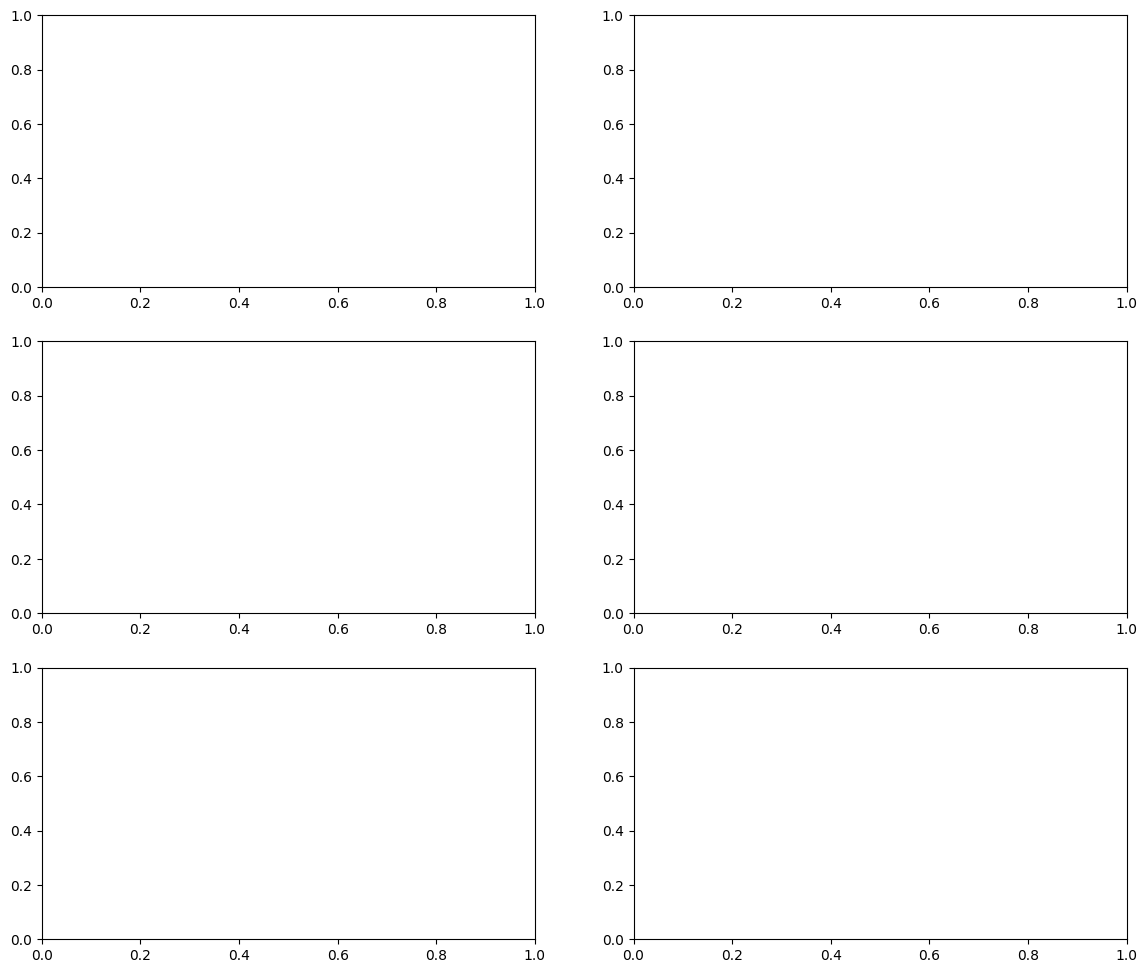

In [30]:
# mengplot hasil statistik agar audience lebih mudah melihat data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

# plot untuk 'harga produk'
data_analysis['harga produk'].plot(kind='hist', bins=20, ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Histogram Harga Produk')
axes[0, 0].set_xlabel('Harga Produk')
axes[0, 0].set_ylabel('Frekuensi')

data_analysis['harga produk'].plot(kind='box', ax=axes[0, 1], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
axes[0, 1].set_title('Box Plot Harga Produk')
axes[0, 1].set_xlabel('Harga Produk')

# plot untuk 'banyak terjual'
data_analysis['banyak terjual'].plot(kind='hist', bins=20, ax=axes[1, 0], color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Histogram Banyak Terjual')
axes[1, 0].set_xlabel('Banyak Terjual')
axes[1, 0].set_ylabel('Frekuensi')

data_analysis['banyak terjual'].plot(kind='box', ax=axes[1, 1], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1, 1].set_title('Box Plot Banyak Terjual')
axes[1, 1].set_xlabel('Banyak Terjual')

# plot untuk 'rating produk'
data_analysis['rating produk'].plot(kind='hist', bins=20, ax=axes[2, 0], color='lightcoral', edgecolor='black')
axes[2, 0].set_title('Histogram Rating Produk')
axes[2, 0].set_xlabel('Rating Produk')
axes[2, 0].set_ylabel('Frekuensi')

data_analysis['rating produk'].plot(kind='box', ax=axes[2, 1], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
axes[2, 1].set_title('Box Plot Rating Produk')
axes[2, 1].set_xlabel('Rating Produk')

plt.tight_layout()
plt.show()


## 2. Potensi minimum & maksimum jika menjual produk seblak

In [ ]:
# menghitung pendapatan per bulan
data_analysis['pendapatan'] = data_analysis['harga produk'] * data_analysis['banyak terjual']

# menghitung rata-rata dan standar deviasi dari pendapatan
mean_pendapatan = data_analysis['pendapatan'].mean()
std_pendapatan = data_analysis['pendapatan'].std()

# menghitung confidence level, menggunakan metode z-score
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)

# menghitung margin of error
margin_of_error = z_score * (std_pendapatan / np.sqrt(len(data_analysis['pendapatan'])))

# menghitung confidence interval
lower_bound = mean_pendapatan - margin_of_error
upper_bound = mean_pendapatan + margin_of_error

# hasil
print(f"Rata-rata pendapatan\t\t\t: {mean_pendapatan:.2f}")
print(f"Standar deviasi pendapatan\t\t: {std_pendapatan:.2f}")
print(f"Margin of Error\t\t\t\t: {margin_of_error:.2f}")
print(f"95% Confidence Interval for Pendapatan\t: ({lower_bound:.2f}, {upper_bound:.2f})")


dari hasil tersebut
- potensi minimum pendapatan menjual seblak adalah Rp17.629.188/bulan
- potensi maximum pendapatan menjual seblak adalah Rp34.794.635/bulan

In [ ]:
# memastikan kolom pendapatan sudah berhasil ditambahkan
data_analysis.info()

In [ ]:
# memastikan kolom pendapatan berhasil ditambahkan
data_analysis.head(3)

## 3. Perbandingan harga antara Jabodetabek dan di luar Jabodetabek

<h4> Hipotesis

- H0: Harga barang di Jabodetabek dan luar Jabodetabek tidak berbeda signifikan
> μ₁ = μ₂
- H1 : Harga barang di Jabodetabek dan luar Jabodetabek berbeda signifikan 
> μ₁ ≠ μ₂



In [ ]:
# cek dimana saja lokasi toko
data_analysis['lokasi toko'].value_counts()

In [ ]:
# membuat list yang berisikan kota-kota Jabodetabek
jabodetabek = ['Jakarta Selatan','Jakarta Timur','Jakarta Pusat','Jakarta Utara','Jakarta Barat ','Tangerang Selatan','Kab. Tangerang','Tangerang','Depok','Kab. Bogor','Bogor']

# membuat kolom baru yang mengklasifikasikan lokasi toko apakah jabodetabek atau bukan
data_analysis['lokasi'] = np.where(data_analysis['lokasi toko'].isin(jabodetabek), 'Jabodetabek', 'Luar Jabodetabek')

In [ ]:
# cek kolom
data_analysis.head(3)

In [ ]:
# menghitung harga produk rata-rata di Jabodetabek dan luar Jabodetabek
harga_jabodetabek = data_analysis[data_analysis['lokasi'] == 'Jabodetabek']['harga produk'].mean()
harga_luar_jabodetabek = data_analysis[data_analysis['lokasi'] != 'Jabodetabek']['harga produk'].mean()

# hipotesis
h0 = np.mean(data_analysis[data_analysis['lokasi'] == 'Jabodetabek']['harga produk']) != np.mean(data_analysis[data_analysis['lokasi'] != 'Jabodetabek']['harga produk'])
h1 = np.mean(data_analysis[data_analysis['lokasi'] == 'Jabodetabek']['harga produk']) == np.mean(data_analysis[data_analysis['lokasi'] != 'Jabodetabek']['harga produk'])

# uji t-test
t_stat, p_value = stats.ttest_ind(data_analysis[data_analysis['lokasi'] == 'Jabodetabek']['harga produk'], data_analysis[data_analysis['lokasi'] != 'Jabodetabek']['harga produk'])

# Tampilkan hasil uji hipotesis
print(f"Rata-rata harga produk di Jabodetabek\t\t: {harga_jabodetabek}")
print(f"Rata-rata harga produk di Luar Jabodetabek\t: {harga_luar_jabodetabek}")
print(f"T-stats\t\t\t\t\t\t: {t_stat}")
print(f"P-Value\t\t\t\t\t\t: {p_value}")

print("")
# hasil hipotesis
if p_value < 0.05:
    print('Hipotesis nol ditolak')
else:
    print('Hipotesis nol diterima')

**Penjelasan:**

- Pada uji hipotesis kali ini kita menggunakan t-stat dikarnakan size sample lebih dari 30, dan jenis hipotesis komparatif yang menggunakan hipotesis dua sisi (two-tailed hypothesis)

- T-stats: Nilai t-stats yang rendah (-0.21) nilai ini menunjukkan perbedaan rata-rata harga antara Jabodetabek dan luar Jabodetabek sangat kecil

- P-value: Nilai p-value yang tinggi (0.84) jauh lebih besar dari tingkat signifikansi (0.05). ini menunjukkan bahwa tidak ada bukti yang cukup untuk menolak hipotesis null

Berdasarkan data yang tersedia, tidak ada bukti yang cukup kuat untuk menunjukkan bahwa harga barang di Jabodetabek berbeda secara signifikan dengan harga di luar Jabodetabek. Perbedaan kecil pada rata-rata harga mungkin karna faktor lain selain biaya bahan baku, seperti biaya transportasi, permintaan, dan penawaran.


## 4. Apakah orang lebih cenderung suka dengan produk yang harganya murah?

In [ ]:
# plotting 
sns.lmplot(data = data_analysis,x='rating produk',y='harga produk')

#### Pearson Correlation (Hubungan Linear)

In [ ]:
# uji korelasi pearson
corr_r , pval_p = stats.pearsonr(data_analysis['harga produk'],data_analysis['rating produk'])

print(f"r-correlation: {corr_r:.2f}\np-value : {pval_p}")

- Terdapat hubungan korelasi negatif antara rating produk dan harga produk.
- Artinya, semakin tinggi harga produk, semakin rendah rating produknya.
- Namun, nilai koefisien korelasinya kecil (kurang dari 0.3), menunjukkan bahwa hubungannya lemah.
- Nilai p jauh lebih kecil dari 0.05 (tingkat signifikansi umum), menunjukkan bahwa terdapat bukti statistik yang kuat untuk menolak hipotesis null (H0) yang menyatakan bahwa tidak terdapat hubungan antara rating produk dan harga produk.

#### Spearman Correlation (Hubungan Non-Linear)

In [ ]:
# uji korelasi spearman
if len(data_analysis['harga produk']) == len(data_analysis['rating produk']):
    corr_a, pval_b = stats.spearmanr(data_analysis['harga produk'].values.reshape(-1,1), data_analysis['rating produk'].values.reshape(-1,1))
    print(f"Spearman correlation: {corr_a:.2f}\np-value: {pval_b}")

- Terdapat hubungan korelasi non-linear yang lemah antara rating produk dan harga produk.
- Arah hubungannya tidak dapat ditentukan secara pasti.
- Nilai p lebih besar dari 0.05 (tingkat signifikansi umum), menunjukkan bahwa tidak terdapat bukti statistik yang cukup untuk menolak hipotesis null (H0) yang menyatakan bahwa tidak terdapat hubungan antara rating produk dan harga produk.

# E. Conclusion

#### 1. Mean, Median, Standard Deviation, Skewness, Kurtosis

**Harga Produk:**

* Rata-rata: Rp21.074,81
* Median: Rp16.990,00
* Variasi harga tinggi (standar deviasi Rp20.672,20)
* Banyak produk dengan harga murah, beberapa dengan harga sangat tinggi (skewness 3.78)
* Beberapa produk memiliki harga ekstrem (kurtosis 20.63)

**Banyak Terjual:**

* Rata-rata: 1.154,68 unit
* Median: 250 unit
* Variasi jumlah terjual besar (standar deviasi 2.461,28 unit)
* Banyak produk terjual sedikit, beberapa terjual sangat banyak (skewness 2.93)
* Beberapa produk terjual dalam jumlah ekstrem (kurtosis 7.63)

**Rating Produk:**

* Rata-rata: 4.87
* Median: 4.90
* Rating tinggi dan konsisten (standar deviasi 0.12)
* Mayoritas produk mendapat rating sangat baik (skewness -2.23)
* Beberapa produk memiliki rating jauh lebih tinggi dibanding rating produk/toko lainya (kurtosis 12.00)

***Kesimpulan:***

Harga produk bervariasi besar, dengan beberapa produk memiliki harga sangat tinggi.
Sebagian besar produk terjual dalam jumlah sedikit, dengan beberapa produk terjual sangat banyak.
Mayoritas produk mendapat rating sangat baik.


#### 2. Potensi minimum & maksimum jika menjual produk seblak

* Rata-rata Pendapatan Bulanan: Rp26.211.911,83

* Variasi Pendapatan Bulanan:

    - Standar Deviasi: Rp62.850.777,02
    - Lower Bound: Rp17.629.188,13
    - Upper Bound: Rp34.794.635,54

* Potensi Pendapatan Bulanan (95% Confidence Interval):

    - Minimum: Rp17.629.188,13
    - Maksimum: Rp34.794.635,54

***Kesimpulan:***

Berdasarkan data yang tersedia, potensi pendapatan bulanan dari penjualan seblak bervariasi antara Rp17.629.188,13 dan Rp34.794.635,54 dengan tingkat kepercayaan 95%.

#### 3. Perbandingan harga antara Jabodetabek dan di luar Jabodetabek

- Hipotesis:
    * Hipotesis Nol (H0): Tidak terdapat perbedaan yang signifikan antara harga barang di Jabodetabek dan luar Jabodetabek.
    * Hipotesis Alternatif (H1): Terdapat perbedaan yang signifikan antara harga barang di Jabodetabek dan luar Jabodetabek.

- Jenis Uji Hipotesis:
    * Uji t dua sampel, karena sampel lebih dari 30 dan hipotesis komparatif dengan dua sisi (two-tailed hypothesis).

- Hasil:
    * T-statistik: -0.20776693636456778
    * Nilai P: 0.8356182173095233

***Kesimpulan:***

Meskipun biaya bahan baku berbeda di Jabodetabek dan luar Jabodetabek, data menunjukkan bahwa tidak terdapat perbedaan yang signifikan dalam harga barang di kedua lokasi. Hal ini menunjukkan bahwa faktor lain, seperti biaya transportasi, permintaan, dan penawaran, mungkin memainkan peran yang lebih besar dalam menentukan harga barang.

#### 4. Apakah orang lebih cenderung suka dengan produk yang harganya murah?

- Terdapat hubungan korelasi negatif yang lemah antara rating produk dan harga produk. Artinya, semakin tinggi harga produk, semakin rendah rating produknya.
- Hubungan ini lemah, dengan nilai koefisien korelasi Pearson sebesar -0.21.
- Hubungan ini berstatistik signifikan, dengan nilai p-value Pearson jauh lebih kecil dari 0.05.
- Hubungan non-linear antara rating produk dan harga produk tidak dapat ditentukan secara pasti, dengan nilai koefisien korelasi Spearman sebesar 0.06 dan nilai p-value Spearman lebih besar dari 0.05.

***Kesimpulan:***

Meskipun terdapat hubungan korelasi negatif yang lemah antara rating produk dan harga produk, masih banyak faktor lain yang perlu dipertimbangkan untuk menentukan apakah orang lebih cenderung suka dengan produk yang harganya murah.